# Aprendizado de Máquina 2 - T1

### Membros:
### Enio Martinelli - RA:790891
### Fernando Cincinato - RA:790947

#### Aplicação de modelos de aprendizagem semi-supervisionada para classificação de músicas em gêneros musicais.


  Este projeto tem como objetivo classificar músicas não rotuladas por gênero por meio de modelos de aprendizagem semi-supervisionada: Label Propagation, K-means com restrições e HDBSCAN

Os dados utilizados e mais detalhes sobre eles podem ser encontrados [aqui](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre/data).

  O projeto foi realizado nas seguintes etapas:

1.   Visualição dos dados

2.   Análise e pré-processamento

3.   Aplicação dos algoritmos

4.   Discussão dos resultados

# Visualização dos dados




In [28]:
import pandas as pd

data= pd.read_csv("music_genre.csv")
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


Neste dataset, temos 50.005 objetos com 18 atributos. A seguir, haverá uma explicação sobre o que cada um desses atributos representam:

+ _instance_id_ $→$ É o id único que cada música recebe.
+ _artist_name_ $→$ O nome do artista.
+ _track_name_ $→$ O nome da música.
+ _popularity_ $→$ A medida da popularidade da música que foi dada pelo dataset, varia de 0 a 99
+ _acoustiness_ $→$ Representa a chance de uma música de ser acústica, variando de 0(não é acústica) até 1(é acústica).
+ _danceability_ $→$ É uma medida que considera diversos elementos musicais (ritmo, estabilidade do ritmo e outras) para decidir o quão adequada é uma música para a dança. 0 para pouco 'dançável' e 1 para muito 'dançável'.
+ _duration_ms_ $→$ Mede a duração da música em milissegundos
+ _energy_ $→$ Varia de 0,0 a 1,0 e representa a intensidade e atividade. Músicas energéticas são, normalmente, mais rápidas, com um volume alto e barulhentas. É calculada usando algumas características da música como : intensidade percebida, faixa dinâmica, timbre, taxa de ínicio e entropia geral.
+ _instrumentalness_ $→$ Determina a instrumentalidade de uma música, ou seja, o quão instrumental é uma música. Onomatopéias são tratadas como sons instrumentais, enquanto palavras são tratadas como "vocal". 1,0 representa uma música instrumental, é importante ressaltar que valores acima de 0,5 são representados como instrumentais pelo Spotify.
+ _key_ $→$ Representa o tom da música. A notação usada é a padrão de países ingleses e alemães (A escala musical é representada pelas primeiras letras do alfabeto).
+ _liveness_ $→$ Detecta a presença de uma plateia na música, valores altos indicam uma chance maior da música ter sido gravada ao vivo. O Spotify considera valores maiores que 0,8 como uma música gravada ao vivo.
+ _loudness_ $→$ Intensidade média da música medida em decibéis, tem valores de -60 até 4.
+ _mode_ $→$ Determina se o tom é maior ou menor.
+ _speechiness_ $→$ Respresenta a presença de palavras faladas em uma música. Varia de 0,0 e 1,0, valores acima de 0,66 agrupam músicas exclusivamente faladas (aúdio books, talk show, poesia), valores entre 0,33 e 0,66 para música(não vocal) e fala, e 0,33 outras músicas que não envolvem a fala.
+ _tempo_ $→$ Ritmo da música em bpm.
+ _obtained_date_ $→$ Data em que a música foi obtida no dataset (coluna sem importância para a predição)
+ _valence_ $→$ Mede a positividade de uma música. Varia de 0,0 a 1,0 com valores altos associados a músicas positivas (alegria, eufória) e valores baixos a músicas negativas (tristeza, raiva).
+ _music_genre_ $→$ Gênero musical, essa é a nossa classe-alvo que tentaremos predizer.

In [29]:
# Começar exluindo alguns atributos que não nos interessam para a atividade de classificação
# Por ser simplesmente um id:
# 'instance_id', 'artist_name' e 'track_name'

data = data.drop(['instance_id', 'artist_name', 'track_name'], axis=1)
data.shape

(50005, 15)

In [30]:
# Visão geral de cada atributo
for i in data.columns:
  print(data[i].describe())
  print()

count    50000.000000
mean        44.220420
std         15.542008
min          0.000000
25%         34.000000
50%         45.000000
75%         56.000000
max         99.000000
Name: popularity, dtype: float64

count    50000.000000
mean         0.306383
std          0.341340
min          0.000000
25%          0.020000
50%          0.144000
75%          0.552000
max          0.996000
Name: acousticness, dtype: float64

count    50000.000000
mean         0.558241
std          0.178632
min          0.059600
25%          0.442000
50%          0.568000
75%          0.687000
max          0.986000
Name: danceability, dtype: float64

count    5.000000e+04
mean     2.212526e+05
std      1.286720e+05
min     -1.000000e+00
25%      1.748000e+05
50%      2.192810e+05
75%      2.686122e+05
max      4.830606e+06
Name: duration_ms, dtype: float64

count    50000.000000
mean         0.599755
std          0.264559
min          0.000792
25%          0.433000
50%          0.643000
75%          0.815000
m

In [31]:
labels = data['music_genre']
labels.unique()
#data.loc[data['music_genre'] == Nan]

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

# Análise e pré-processamento

### **Tratamentos inciais sobre os dados**

Começaremos pelo pré-processamento mais básico, analisaremos valores que não fazem sentido entre os dados, converteremos alguns dados categóricos em numéricos e haverá a exclusão de atributos não importantes.

In [32]:
# verificar se há valores nulos em cada coluna
null_counts = data.isna().sum()
print(null_counts)

# Verificar se há valores nulos em cada linha
linhas_com_nulos = data.isnull().any(axis=1)

# Selecionar as linhas que contêm valores nulos
linhas_nulos = data[linhas_com_nulos]

print("Linhas com valores nulos:")
print(linhas_nulos)


popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64
Linhas com valores nulos:
       popularity  acousticness  danceability  duration_ms  energy  \
10000         NaN           NaN           NaN          NaN     NaN   
10001         NaN           NaN           NaN          NaN     NaN   
10002         NaN           NaN           NaN          NaN     NaN   
10003         NaN           NaN           NaN          NaN     NaN   
10004         NaN           NaN           NaN          NaN     NaN   

       instrumentalness  key  liveness  loudness mode  speechiness tempo  \
10000               NaN  NaN       NaN       NaN  NaN          NaN   NaN   
10001               NaN  NaN       NaN       NaN  NaN     

Vimos que os valores nulos de cada coluna estão todos nas mesmas linhas, portanto vamos excluir essas linhas do dataset


In [33]:
print("tamanho do data set antes de exluir linhas:",data.shape)

# Excluir as linhas de 10000 a 10004
indices_para_excluir = list(range(10000, 10005))  # Cria uma lista de índices a serem removidos
data = data.drop(indices_para_excluir)

# Verificar se as linhas foram removidas
print("tamanho do data set depois de exluir linhas:", data.shape)  # Para verificar o novo tamanho do DataFrame após a remoção das linhas


tamanho do data set antes de exluir linhas: (50005, 15)
tamanho do data set depois de exluir linhas: (50000, 15)


### **Excluindo valores negativos em ritmo**

In [34]:
import numpy as np

#A coluna tempo apresenta vários objetos que tem o valor '?', quantos desses são?
interrogacao = np.where(data['tempo'] == '?')
print('interrogacao = ',len(interrogacao[0]))
print('generos afetados :')
teste = data.iloc[interrogacao[0], data.columns.get_loc('tempo')]
print(np.unique(teste, return_counts=True))

interrogacao =  4980
generos afetados :
(array(['?'], dtype=object), array([4980]))


In [35]:
#Aproximadamente 10% de todos os gêneros possuem esse erro (consequentemente 10% do total dos dados)
#A estratégia abordada neste trabalho será da eliminação dos objetos que têm esse erro
#Não é o ideal, mas o ritmo é fundamental para uma música, como não podemos inferir qual o ritmo de uma música facilmente,
#temos 2 soluções para este problema : Ou excluímos toda a coluna do ritmo (certamente não é uma boa ideia) ou excluímos os objetos defeituosos.
#Optamos pela última opção, a fim de manter o foco no problema de predição dos gêneros musicais.

data =  data.loc[data['tempo'] != '?' ]
data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


### **Plotando alguns gráficos para melhorar a visualização**

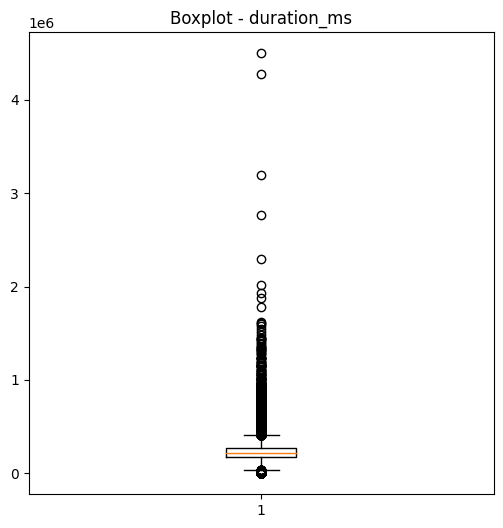

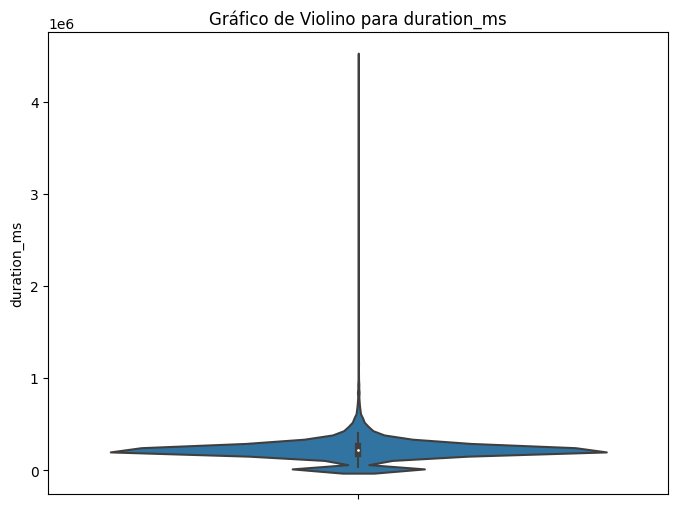

In [36]:
# O atributo 'duration_ms' apresentou um valores mínimo e máximo muito distantes
# Verificar se é um outlier

import matplotlib.pyplot as plt
import seaborn as sns

# Criar o boxplot
plt.figure(figsize=(6, 6))
plt.boxplot(data['duration_ms'])
plt.title('Boxplot - duration_ms')
#plt.ylim(-2, 5)  # Definir limites no eixo y
plt.show()

# Gráfico de violino para 'duration_ms'
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['duration_ms'])
plt.title('Gráfico de Violino para duration_ms')
plt.ylabel('duration_ms')
plt.show()


Pela análise do boxplot vemos a presença de dois valores isolados (potencialmente outliers), porém decidimos mantê-los, já que a duração da música é um atributo importante, e não é impossível músicas com esses tempos, músicas clássicas, por exemplo, costumam ter uma duração maior que a média.

### **Colunas numéricas**

<Figure size 1000x600 with 0 Axes>

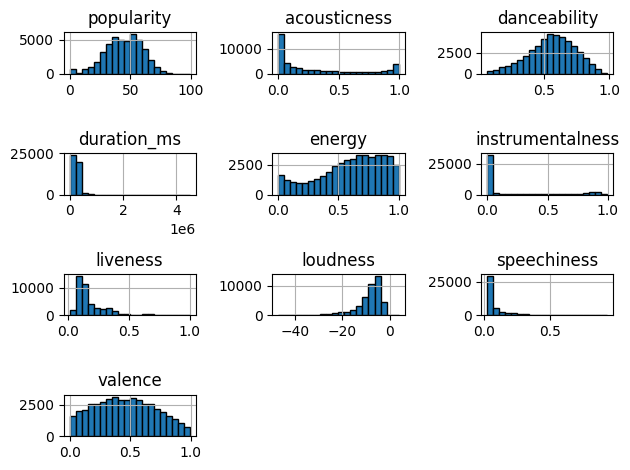

<Figure size 1600x1200 with 0 Axes>

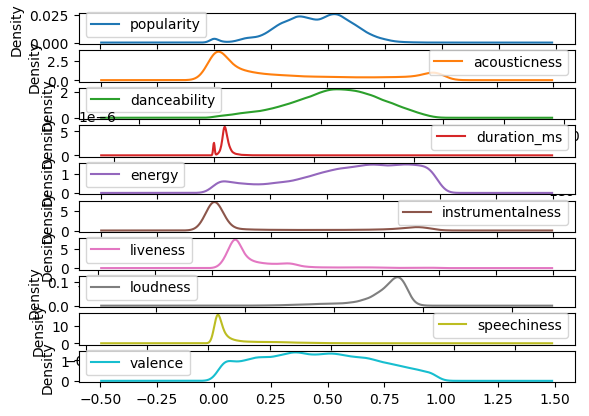

In [37]:
# Selecionar apenas as colunas numéricas
colunas_numericas = data.select_dtypes(include=[float, int]).columns

# Gerar histogramas para as colunas numéricas
plt.figure(figsize=(10, 6))
data[colunas_numericas].hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Gerar gráficos de densidade para as colunas numéricas
plt.figure(figsize=(16, 12))
data[colunas_numericas].plot(kind='density', subplots=True, layout=(len(colunas_numericas), 1), sharex=False)
plt.tight_layout()
plt.show()



### **Colunas categóricas**

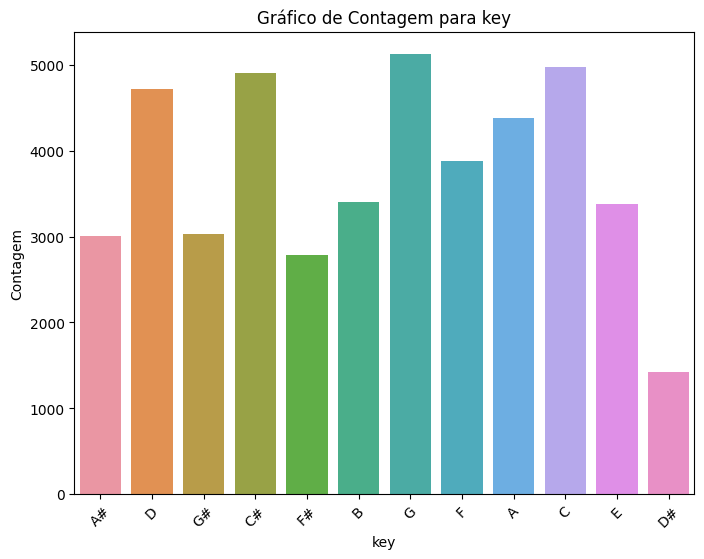

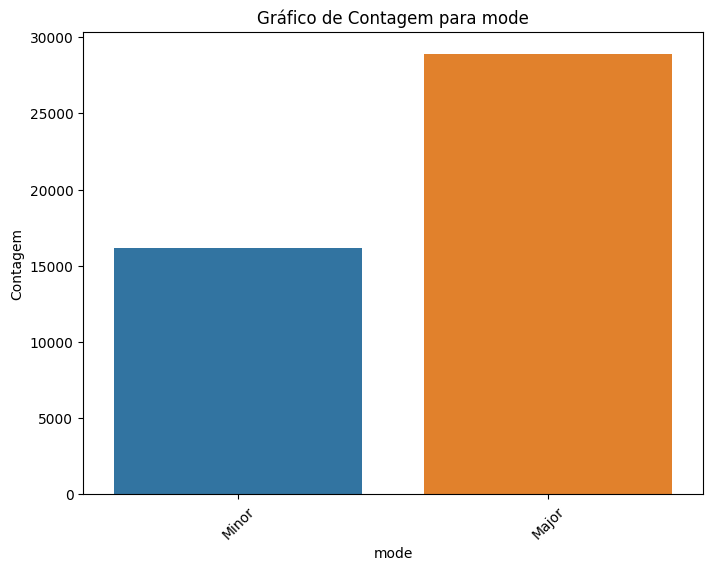

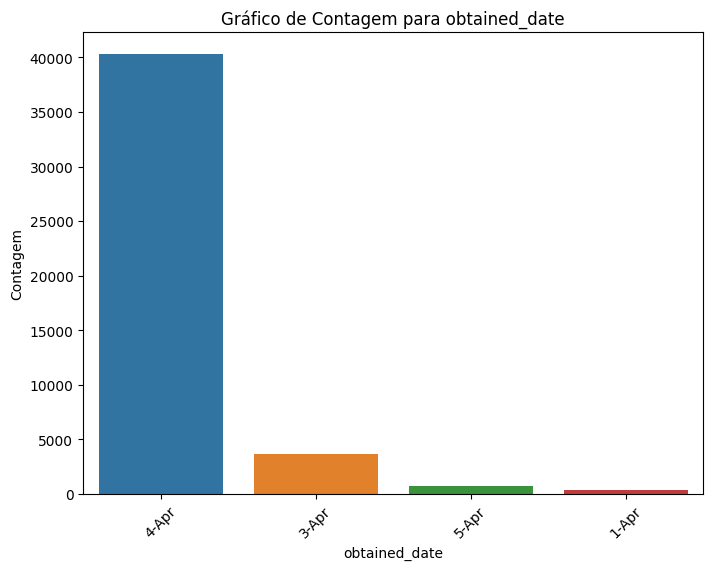

In [38]:
# Selecionar apenas as colunas categóricas
colunas_categoricas = ['key','mode','obtained_date']

# Criar gráficos para cada coluna categórica
for coluna in colunas_categoricas:
    # Gráfico de Contagem (Count Plot)
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=coluna)
    plt.title(f'Gráfico de Contagem para {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)  # Rotacionar rótulos do eixo x se necessário
    plt.show()


### **Convertendo as notas para números**

A coluna 'key' mostra qual tom a música foi escrita e se esse tom é sustenido. Sabemos pela escala musical que cada nota é separada por um tom, e há um semitom entre as notas, assim, podemos facilmente transformar a escala categórica para uma numérica

$A ↔ Lá ↔ 1 \\
B ↔ Si ↔ 2\\
C ↔ Dó ↔ 3\\
D ↔ Ré ↔ 4\\
E ↔ Mi ↔ 5\\
F ↔ Fá ↔ 6\\
G ↔ Sol ↔ 7\\
$


Como estabelecemos 1 como a distância entre os tons, notas maiores ou menores acrescerão ou diminuírão metade deste valor, ou seja, 0,5.

+ Exemplo: **C#** (Dó maior) $↔ 3,5$


In [39]:
# Mostrando as notas existentes
np.unique(data['key'])
N = len(data['key'])

data['key_transformed'] = 0.0 # Criando a coluna nova

def converterKey(nota):
  resultado = 0.0
  if len(nota) > 1:
    # Neste dataset, mais de uma letra sempre é uma nota sustenida, portanto
    # Já podemos adicionar 0,5 no resultado
    nota = nota[0]
    resultado = 0.5

  resultado += ord(nota) - 64.0  # Converter a letra para o valor ascii e subtrair
                                 # Para manter a relação exposta anteriormente
  return resultado

# Conversão para numérico
for i in range(N):
  data.iloc[i, data.columns.get_loc('key_transformed')] = converterKey(data.iloc[i]['key'])

# Excluir a coluna original categórica
data = data.drop('key', axis=1)

### **Análise sobre os atributos**

       popularity  acousticness  danceability  duration_ms  energy  \
10       0.278351       0.03370         0.513     0.114239   0.828   
14       0.515464       0.00331         0.391     0.166032   0.957   
19       0.453608       0.00804         0.516     0.167331   0.920   
40       0.494845       0.00409         0.721     0.180527   0.938   
64       0.371134       0.19600         0.746     0.305906   0.459   
...           ...           ...           ...          ...     ...   
44977    0.536082       0.30300         0.502     0.158330   0.801   
44981    0.536082       0.15500         0.389     0.138862   0.725   
44990    0.515464       0.26100         0.388     0.137705   0.790   
45008    0.556701       0.30400         0.642     0.182267   0.353   
45019    0.690722       0.10200         0.862     0.184896   0.642   

       instrumentalness  liveness  loudness  speechiness     tempo  valence  \
10             0.569000    0.1090  0.865338       0.0609  0.784870   0.0591   
1

[]

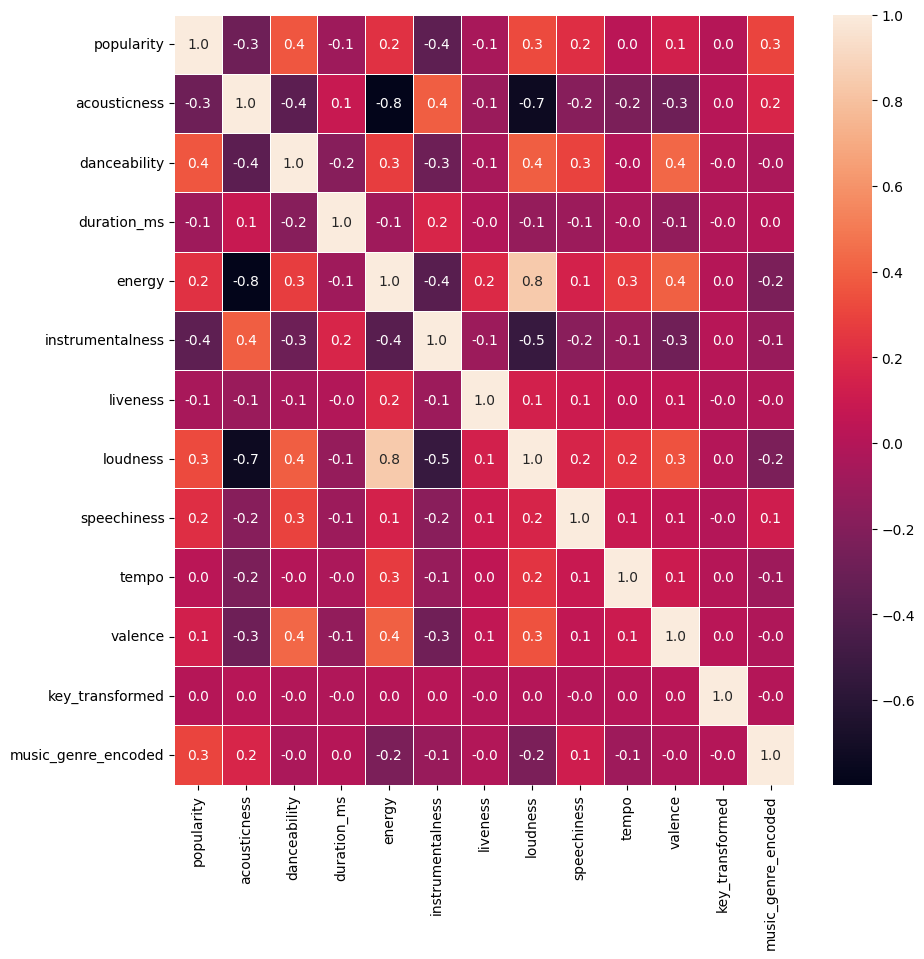

In [70]:
#Calculando a correlação
#precisamos dar um jeito com key, e mudar mode para algo binário como -1 e 1,
#heatmp = data.drop(['track_name', 'artist_name',  'key', 'mode', 'obtained_date', 'music_genre'], axis=1)
heatmp =  data.loc[data['tempo'] != '?' ]

def converterColuna(heatmp, coluna):
    heatmp[coluna] = (heatmp[coluna] - heatmp[coluna].min()) / (heatmp[coluna].max() - heatmp[coluna].min())
    return heatmp[coluna]
heatmp['popularity'] = converterColuna(heatmp, 'popularity')
heatmp['tempo'] = converterColuna(heatmp, 'tempo')
heatmp['duration_ms'] = converterColuna(heatmp, 'duration_ms')
heatmp['key_transformed'] = converterColuna(heatmp, 'key_transformed')
heatmp['loudness'] = converterColuna(heatmp, 'loudness')


print(heatmp)

data_cor = heatmp.iloc[:,:].corr()
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_cor, annot = True, fmt=".00001f", linewidths=.6, ax=ax)


plt.plot()

Agora que alguns dos dados foram tratados, avaliaremos a importância de alguns atributos utilizando random forest

In [43]:
data


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,key_transformed
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,1.5
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic,4.0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,7.5
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,3.5
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop,3.5
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop,2.0
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop,4.0
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop,7.0


In [44]:
# AVALIANDO A RELEVÂNCIA DOS ATRIBUTOS PARA CLASSIFICAÇÃO

from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading



#data['music_genre_encoded'] = label_encoder.fit_transform(data['music_genre'])
# Criando um dicionário de mapeamento
mapeamento = {
    'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3,
    'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7,
    'Classical': 8, 'Hip-Hop': 9
}

# Substituindo os valores da coluna 'music_genre' pelos valores mapeados
data['music_genre_encoded'] = data['music_genre'].replace(mapeamento)

# Codificar atributos categóricos para numéricos
label_encoder = preprocessing.LabelEncoder()
data['mode_encoded'] = label_encoder.fit_transform(data['mode'])
data['obtained_date_encoded'] = label_encoder.fit_transform(data['obtained_date'])

# Usando Random Forest

# Selecionar apenas os atributos numéricos
atributos_numericos = data.select_dtypes(include='number')

X = atributos_numericos.drop('music_genre_encoded', axis=1)  # Atributos preditivos
y = atributos_numericos['music_genre_encoded']  # Atributo alvo (classe)

# Criar o classificador de floresta aleatória
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Avalie a importância dos atributos
importancias_atributos = clf.feature_importances_


# Reavaliando após normalização dos atributos numéricos

from sklearn.preprocessing import StandardScaler

# Crie um objeto StandardScaler
scaler = StandardScaler()

# Ajuste e transforme os dados
X_scaled = scaler.fit_transform(X)

# Criar o classificador de floresta aleatória

clf.fit(X_scaled, y)

# Avalie a importância dos atributos
importancias_atributos1 = clf.feature_importances_

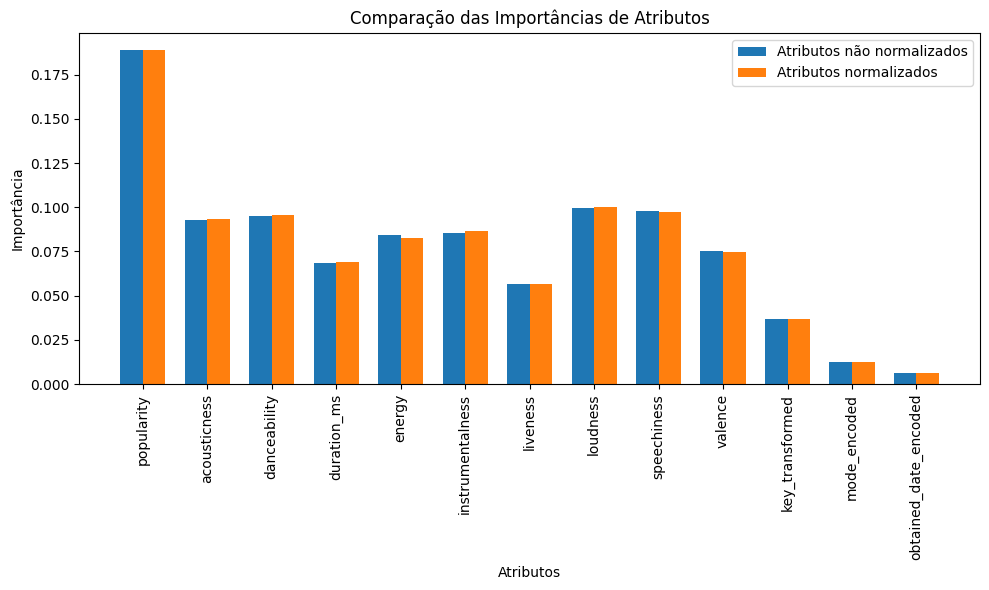

In [45]:

# Nomes dos atributos (opcional, só para eixo x do gráfico)
nomes_atributos = X.columns

# Posição no eixo x para os grupos
posicoes = np.arange(len(importancias_atributos))

# Largura das barras
largura = 0.35  # Ajuste conforme necessário para espaçamento entre as barras

# Plotagem das barras
plt.figure(figsize=(10, 6))
plt.bar(posicoes - largura/2, importancias_atributos, largura, label='Atributos não normalizados')
plt.bar(posicoes + largura/2, importancias_atributos1, largura, label='Atributos normalizados')

# Configurações do gráfico
plt.xlabel('Atributos')
plt.ylabel('Importância')
plt.title('Comparação das Importâncias de Atributos')
plt.xticks(posicoes, nomes_atributos, rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Os atributos 'mode' e 'obtined_date' não se mostraram relevantes, portando serão exluídos.

Também será excluído o atributo 'music_genre' já codificado

In [46]:
data = data.drop(['mode','mode_encoded','obtained_date','obtained_date_encoded','music_genre'],axis=1)
print("tamanho do data set depois de exluir colunas:", data.shape) # Espera-se que tenha 50000 linhas e 13 colunas
data

tamanho do data set depois de exluir colunas: (45020, 13)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_transformed,music_genre_encoded
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,1.5,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.00200000000001,0.531,4.0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,7.5,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,3.5,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,6.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,98.02799999999999,0.330,3.5,9
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,122.04299999999999,0.113,2.0,9
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,4.0,9
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,75.88600000000001,0.354,7.0,9


# Aplicação dos algoritmos

É necessários tornar alguns dados como não rotulados, já que o data set possui todos rotulados. Foi escolhido 93% de cada classe dos dados para serem não rotulados, garantindo que vão ter dados rotulados de todas as classes.

In [49]:
data.to_csv('music_genre_pre_processado.csv', index=False)

In [50]:
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random


In [62]:
data = pd.read_csv("music_genre_pre_processado.csv")

In [63]:
indices_pos_excluidos = []
for classe in data['music_genre_encoded'].unique():
  indices_classe = data['music_genre_encoded'][data['music_genre_encoded'] == classe].index
  qtd_excluidos = int(0.9 * len(indices_classe))  # excluindo 90% de cada atributo
  indices_excluidos = random.sample(indices_classe.tolist(), k=qtd_excluidos)
  indices_pos_excluidos.extend(indices_excluidos)

  data = data.drop(indices_excluidos)  # Exclui os indices selecionados

data.shape

(4506, 13)

In [12]:
data

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,music_genre_encoded
13,0.000194,0.601,243857.0,0.969,0.776000,-1.553,0.1850,139.911,0.1980,5
28,0.033600,0.740,222241.0,0.830,0.401000,-3.783,0.0603,135.057,0.1550,5
29,0.000556,0.585,264576.0,0.953,0.009490,-2.734,0.0797,127.989,0.6610,5
30,0.000190,0.595,467816.0,0.942,0.720000,-11.220,0.0416,130.013,0.0333,5
33,0.149000,0.419,346324.0,0.879,0.476000,-2.876,0.0481,109.055,0.6100,5
...,...,...,...,...,...,...,...,...,...,...
45011,0.036300,0.829,230147.0,0.435,0.878000,-10.136,0.0515,103.816,0.5940,6
45012,0.171000,0.587,254694.0,0.711,0.000000,-6.330,0.4200,98.008,0.3810,6
45014,0.133000,0.849,237667.0,0.660,0.000008,-7.195,0.0516,99.988,0.6290,6
45015,0.033400,0.913,-1.0,0.574,0.000000,-7.022,0.2980,98.028,0.3300,6


In [65]:
#lista = list(range(0, len(data['popularity']), 2))

#data = data.drop(labels=lista, axis = 0)
def converterColuna(heatmp, coluna):
    heatmp[coluna] = (heatmp[coluna] - heatmp[coluna].min()) / (heatmp[coluna].max() - heatmp[coluna].min())
    return heatmp[coluna]
data['popularity'] = converterColuna(data, 'popularity')
data['tempo'] = converterColuna(data, 'tempo')
data['duration_ms'] = converterColuna(data, 'duration_ms')
data['key_transformed'] = converterColuna(data, 'key_transformed')
data['loudness'] = converterColuna(data, 'loudness')
data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_transformed,music_genre_encoded
10,0.278351,0.03370,0.513,0.114239,0.828,0.569000,0.1090,0.865338,0.0609,0.784870,0.0591,0.153846,0
14,0.515464,0.00331,0.391,0.166032,0.957,0.220000,0.1120,0.927639,0.0904,0.355971,0.1210,0.923077,0
19,0.453608,0.00804,0.516,0.167331,0.920,0.614000,0.8010,0.888076,0.0942,0.601794,0.3320,0.000000,0
40,0.494845,0.00409,0.721,0.180527,0.938,0.275000,0.3800,0.899817,0.0921,0.497922,0.1610,0.384615,0
64,0.371134,0.19600,0.746,0.305906,0.459,0.871000,0.1820,0.693751,0.0660,0.465169,0.3510,0.384615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44977,0.536082,0.30300,0.502,0.158330,0.801,0.000007,0.1990,0.779172,0.4090,0.346265,0.3340,0.384615,9
44981,0.536082,0.15500,0.389,0.138862,0.725,0.000007,0.2030,0.863062,0.0690,0.770859,0.3930,0.923077,9
44990,0.515464,0.26100,0.388,0.137705,0.790,0.000000,0.4640,0.803718,0.3800,0.794970,0.7210,0.384615,9
45008,0.556701,0.30400,0.642,0.182267,0.353,0.000000,0.0927,0.717616,0.2150,0.299010,0.2760,0.076923,9


In [66]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
import random

labels_originais = [data['music_genre_encoded']]


porcentagens_rotulos = [0.93, 0.90, 0.85, 0.80, 0.75, 0.70] # Testar para todas essas porcentagens de dados rotulados
datas_processadas = [data.copy() for _ in range(len(porcentagens_rotulos))]
true_labels = [data.copy() for _ in range(len(porcentagens_rotulos))]

porcentagens_teste = [0.1, 0.15, 0.2, 0.25, 0.3]
X_train = [[] for _ in range(len(porcentagens_rotulos)*len(porcentagens_teste))]
X_test = [[] for _ in range(len(porcentagens_rotulos)*len(porcentagens_teste))]
y_train = [[] for _ in range(len(porcentagens_rotulos)*len(porcentagens_teste))]
y_test = [[] for _ in range(len(porcentagens_rotulos)*len(porcentagens_teste))]
cont=0
for i in range(len(porcentagens_rotulos)):
  print()
  print(f'Porcentagem de dados não rotulados: {porcentagens_rotulos[i]*100:.0f}%')
  for teste in porcentagens_teste:
    X_train[cont], X_test[cont], y_train[cont], y_test[cont] = train_test_split(data.drop('music_genre_encoded', axis=1), data['music_genre_encoded'], test_size=teste, random_state=42)
    indices_rotulados = []
    indeces_classe = []
    #print(y_train[i])
    for classe in y_train[cont].unique():
        indices_classe = y_train[cont][y_train[cont] == classe].index
        qtd_nao_rotulados = int(porcentagens_rotulos[i] * len(indices_classe))  # porcentagens_rotulos[i]% de cada classe não rotulada
        indices_nao_rotulados = random.sample(indices_classe.tolist(), k=qtd_nao_rotulados)
        indices_rotulados.extend(indices_nao_rotulados)

    # Marque os valores como não rotulados (-1)
    #true_labels[i] = y_train[cont].loc[indices_rotulados]  # Armazena o valor orinal dos rotulos
    y_train[cont].loc[indices_rotulados] = -1  # Define os valores selecionados como não rotulados

    # Contagem de valores com -1 na coluna 'music_genre_encoded'
    contagem = y_train[cont].value_counts().get(-1, 0)

    print(f"teste_size: {teste} - Quantidade de valores -1 na coluna 'music_genre_encoded': {contagem}") # Visualizar quantos dados forão não rotulados
    #print(y_train[cont].unique())
    cont+=1



Porcentagem de dados não rotulados: 93%
teste_size: 0.1 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3767
teste_size: 0.15 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3557
teste_size: 0.2 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3346
teste_size: 0.25 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3139
teste_size: 0.3 - Quantidade de valores -1 na coluna 'music_genre_encoded': 2929

Porcentagem de dados não rotulados: 90%
teste_size: 0.1 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3646
teste_size: 0.15 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3442
teste_size: 0.2 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3241
teste_size: 0.25 - Quantidade de valores -1 na coluna 'music_genre_encoded': 3037
teste_size: 0.3 - Quantidade de valores -1 na coluna 'music_genre_encoded': 2834

Porcentagem de dados não rotulados: 85%
teste_size: 0.1 - Quantidade de valores -1 na coluna 'music_gen

In [67]:
data.dtypes

popularity             float64
acousticness           float64
danceability           float64
duration_ms            float64
energy                 float64
instrumentalness       float64
liveness               float64
loudness               float64
speechiness            float64
tempo                  float64
valence                float64
key_transformed        float64
music_genre_encoded      int64
dtype: object

In [69]:
import warnings

# Suprimir todos os warnings
warnings.filterwarnings("ignore")


from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score, classification_report

cont_porcentagem = 0
cont_teste = 0
for i in range(len(porcentagens_rotulos)*len(porcentagens_teste)):

  print(f'Porcentagem de dados não rotulados: {porcentagens_rotulos[cont_porcentagem]*100:.0f}%')


  # Inicializando e treinando o modelo de Label Propagation com os dados rotulados de treino
  lp_model = LabelPropagation()

  lp_model.fit(X_train[i], y_train[i])

  # Gerando previsões nos dados rotulados de teste
  predicted_labels = lp_model.predict(X_test[i])

  # Calculando a acurácia dos dados rotulados de teste
  accuracy_test = accuracy_score(y_test[i], predicted_labels)
  print(f'teste_size: {porcentagens_teste[cont_teste]}')
  print(classification_report(y_test[i], predicted_labels))
  print()

  cont_teste+=1
  if(cont_porcentagem > 5):  cont_porcentagem=0
  if(cont_teste > 4):
    cont_teste=0
    cont_porcentagem+=1


Porcentagem de dados não rotulados: 93%
teste_size: 0.1
              precision    recall  f1-score   support

           0       0.40      0.24      0.30        51
           1       0.00      0.00      0.00        52
           2       0.21      0.13      0.16        46
           3       0.20      0.24      0.22        41
           4       0.15      0.39      0.22        38
           5       0.42      0.26      0.32        50
           6       0.33      0.08      0.13        38
           7       0.18      0.49      0.26        41
           8       0.51      0.76      0.61        42
           9       0.35      0.17      0.23        52

    accuracy                           0.27       451
   macro avg       0.27      0.28      0.24       451
weighted avg       0.28      0.27      0.24       451


Porcentagem de dados não rotulados: 93%
teste_size: 0.15
              precision    recall  f1-score   support

           0       0.44      0.28      0.34        82
           1      